<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/6%20-%20Clustering/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L'algoritmo K-means

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme()

In [ ]:
RANDOM_SEED = 2

### Generiamo i dati

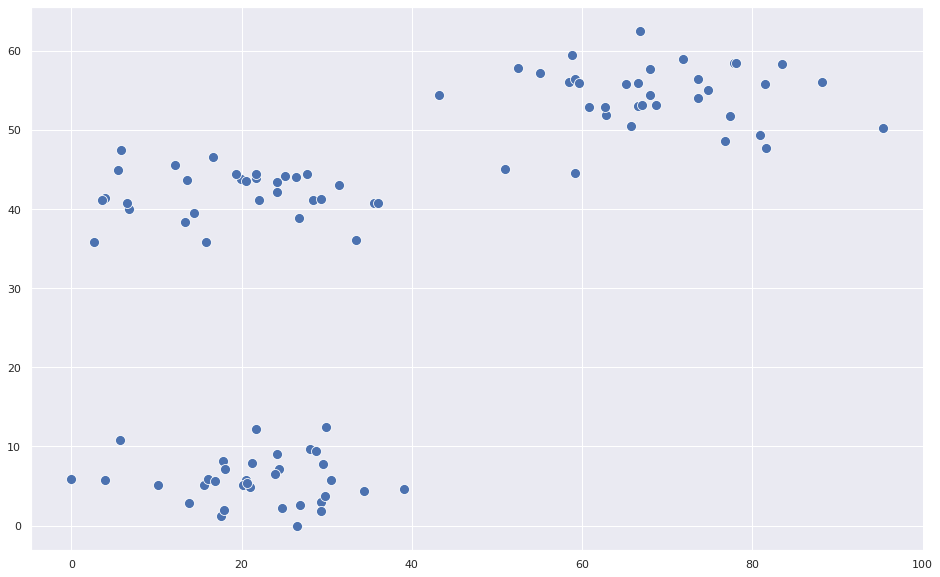

In [ ]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5, random_state=RANDOM_SEED)
X[:,0] = (X[:,0]-X[:,0].min())*20
X[:,1] = (X[:,1]-X[:,1].min())*6 

sns.scatterplot(x=X[:,0], y=X[:,1], s=100)

### Creiamo il modello

In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq
from time import time

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_SEED)
tick = time()
kmeans.fit(X)
print(f"Modello addestrato in {time()-tick:.5f} secondi" )

Modello addestrato in 0.26826 secondi


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_SEED, init="k-means++")
tick = time()
kmeans.fit(X)
print(f"Modello addestrato in {time()-tick:.5f} secondi" )

Modello addestrato in 0.03150 secondi


### Valutiamo il modello

In [ ]:
from scipy.spatial.distance import cdist


In [ ]:
distorsion = sum(np.square(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))) / X.shape[0]
distorsion

107.41040694974288

In [ ]:
inertia = sum(np.square(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)))
inertia

10741.040694974288

In [ ]:
kmeans.inertia_

10741.040694974286

### Visualizziamo i cluster

In [ ]:
y_kmeans = kmeans.predict(X)

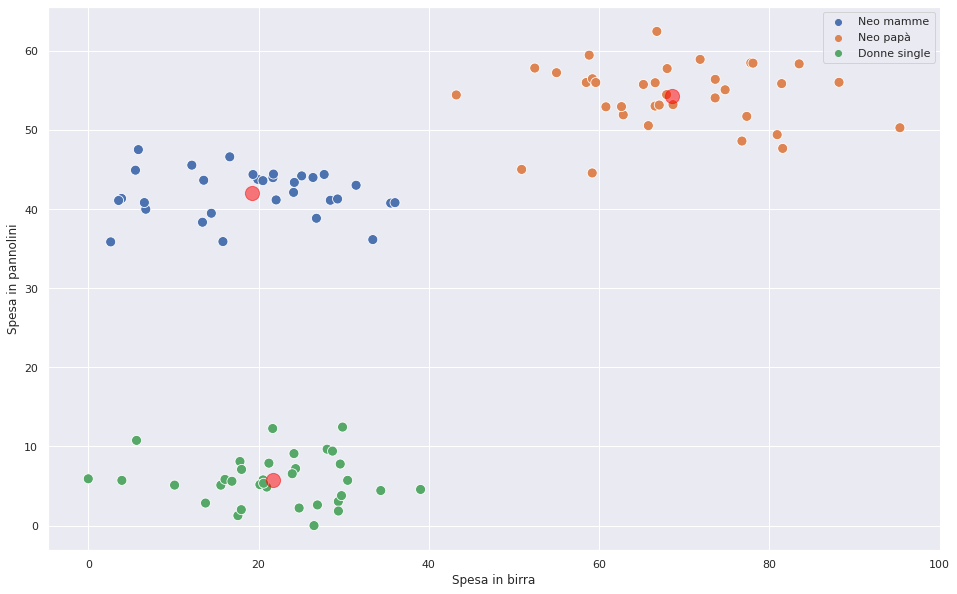

In [ ]:
L = {0:"Donne single",1:"Neo papà",2:"Neo mamme"}
vfunc = np.vectorize(lambda x: L[x])
labels = vfunc(y_kmeans)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, s=100)
plt.xlabel("Spesa in birra")
plt.ylabel("Spesa in pannolini")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);